## Proyecto 1 de Ciencia de Datos en Python

###### Universidad Galileo
###### Maestria de Ciencia de Datos
###### Ciencia de Datos en Python
###### Presentado por: Karina Lissette Díaz
###### Carne: 23006413


### Librerias que se utilizaran en el proyecto

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression


### Carga de datos y sets para el proyecto

In [2]:
data = np.load('proyecto_training_data.npy', allow_pickle = False)
columnas_nom = np.array(['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
columnas_descri = np.array(['Precio', 'Feedback', 'Metros cuadrados del primer nivel', 'Habitaciones', 'Año de construcción', 'Distancia lineal desde la calle'])
shape = data.shape
print("Shape: ", shape)

Shape:  (1460, 6)


In [3]:
traini=int(shape[0]*0.8)
#Datos de entrenamiento del programa
data_traini = data[0:traini,:]
#Datos de validación y pruebas del programa
data_valida= data[traini:shape[0],:]

print("Datos de entrenamiento: ", data_traini.shape)
print("Datos de validación y prueba: ", data_valida.shape)

Datos de entrenamiento:  (1168, 6)
Datos de validación y prueba:  (292, 6)


### Análisis exploratorio de datos

######  Para cada variable en el dataset calcular(usando numpy o pandas): media, valor máximo, valor mínimo, rango y desviación estándar.

In [4]:
def explorar(k_array):
    return k_array.reshape(k_array.shape[0],1)

##### Media

In [5]:
media = explorar(np.nanmean(data, axis=0))
print("\n")
print(pd.DataFrame(media, index=columnas_nom, columns=["Media"]).to_string())




                      Media
SalePrice     180921.195890
OverallQual        6.099315
1stFlrSF        1162.626712
TotRmsAbvGrd       6.517808
YearBuilt       1971.267808
LotFrontage       70.049958


##### Valor máximo

In [6]:
valormaximo = explorar(np.nanmax(data, axis=0))
print("\n")
print(pd.DataFrame(valormaximo, index=columnas_nom, columns=["ValorMáximo"]).to_string())




              ValorMáximo
SalePrice        755000.0
OverallQual          10.0
1stFlrSF           4692.0
TotRmsAbvGrd         14.0
YearBuilt          2010.0
LotFrontage         313.0


##### Valor mínimo

In [7]:
valorminimo = explorar(np.nanmin(data, axis=0))
print("\n")
print(pd.DataFrame(valorminimo, index=columnas_nom, columns=["ValorMínimo"]).to_string())




              ValorMínimo
SalePrice         34900.0
OverallQual           1.0
1stFlrSF            334.0
TotRmsAbvGrd          2.0
YearBuilt          1872.0
LotFrontage          21.0


##### Rango

In [8]:
rangopeaktopeak = explorar(np.ptp(data, axis=0))
print("\n")
print(pd.DataFrame(rangopeaktopeak, index=columnas_nom, columns=["RangoPeakToPeak"]).to_string())
col = np.isnan(data[:,5])
rangopeaktopeak[5, 0] = np.ptp(data[col==False, 5])
print("\n")
print(pd.DataFrame(rangopeaktopeak, index=columnas_nom, columns=["Rango peak to peak (sin nan)"]).to_string())




              RangoPeakToPeak
SalePrice            720100.0
OverallQual               9.0
1stFlrSF               4358.0
TotRmsAbvGrd             12.0
YearBuilt               138.0
LotFrontage               NaN


              Rango peak to peak (sin nan)
SalePrice                         720100.0
OverallQual                            9.0
1stFlrSF                            4358.0
TotRmsAbvGrd                          12.0
YearBuilt                            138.0
LotFrontage                          292.0


#### Desviación estándar

In [9]:
desviacionEstandar = explorar(np.nanstd(data, axis=0))
print("\n")
print(pd.DataFrame(desviacionEstandar, index=columnas_nom, columns=["DesviaciónEstandar"]).to_string())




              DesviaciónEstandar
SalePrice           79415.291886
OverallQual             1.382523
1stFlrSF              386.455322
TotRmsAbvGrd            1.624837
YearBuilt              30.192559
LotFrontage            24.274639


### Graficar un histograma para cada variable

###### Para cada variable en el dataset usat searborn para graficar un histograma de la variable

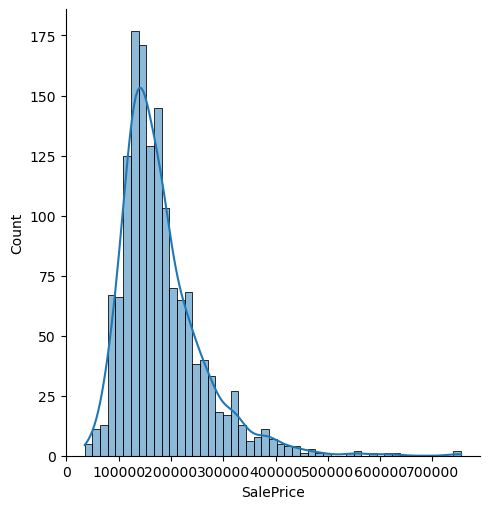

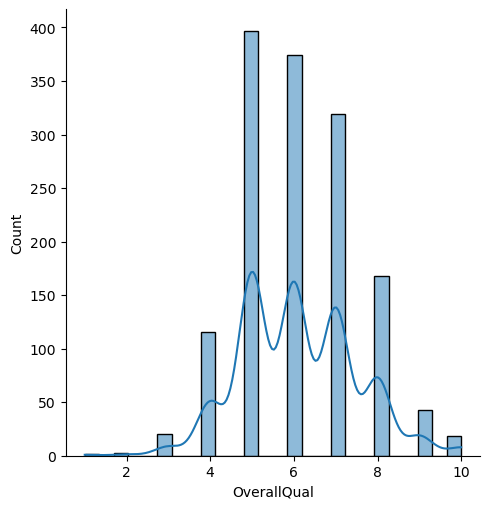

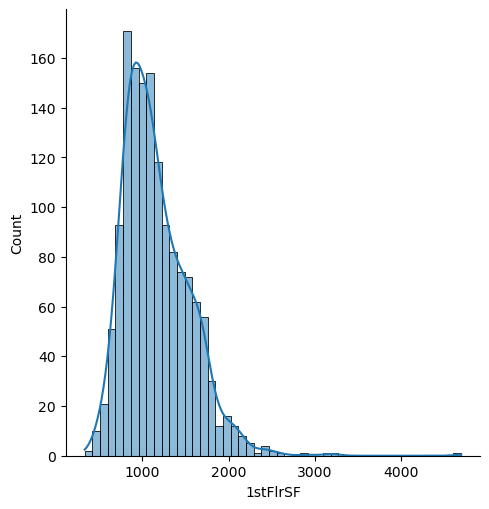

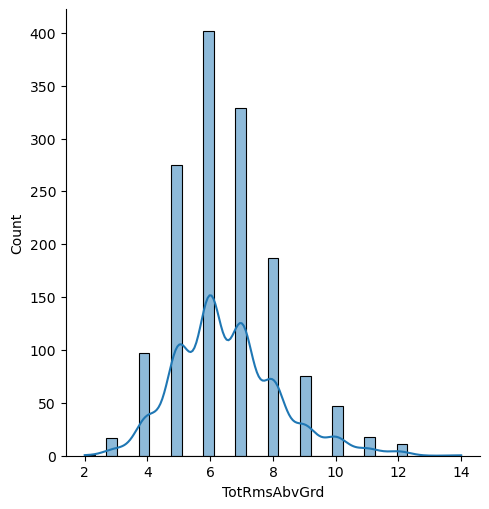

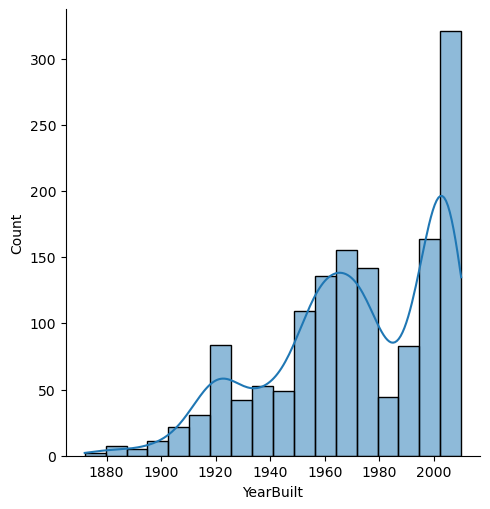

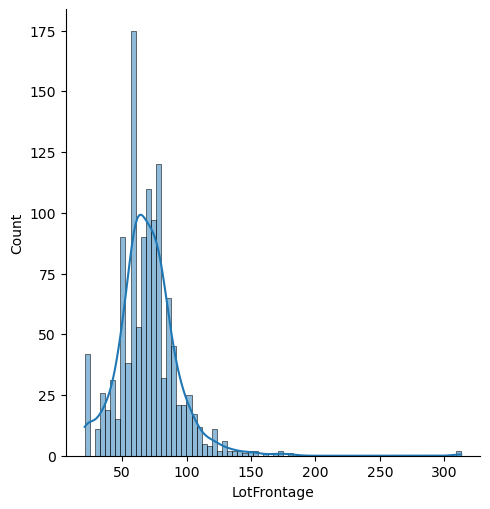

In [10]:

histo0 = sns.displot(data=data[:,0], kde=True)
histo0.set_axis_labels(columnas_nom[0])

histo1 = sns.displot(data=data[:,1], kde=True)
histo1.set_axis_labels(columnas_nom[1])

histo2 = sns.displot(data=data[:,2], kde=True)
histo2.set_axis_labels(columnas_nom[2])

histo3 = sns.displot(data=data[:,3], kde=True)
histo3.set_axis_labels(columnas_nom[3])

histo4 = sns.displot(data=data[:,4], kde=True)
histo4.set_axis_labels(columnas_nom[4])

histo5 = sns.displot(data=data[:,5], kde=True)
histo5.set_axis_labels(columnas_nom[5])


### Para cada variable independiente x:

##### Calcular el coeficiente de corelación entre x y y

In [11]:

covarianza = np.cov(data, rowvar=False)[0,0:]
x = data[col==False, 5]
yno = data[col==False, 0]
covarianza[-1] = np.cov(x, yno)[0,1]
covarianza = covarianza.reshape(1, 6)

print("Covarianza es:")
print(covarianza)

coco = covarianza / (desviacionEstandar[0][0]*desviacionEstandar).reshape(1,6)
print("\nCoheficiente de correlación:\n")
print(pd.DataFrame(coco, columns=columnas_nom).iloc[:,1:6].to_string(index=False))

correlacioncoef = np.corrcoef(data, rowvar=False)[0,0:]

x = data[col==False, 5]
yno = data[col==False, 0]
correlacioncoef[-1] = np.corrcoef(x, yno)[0,1]
correlacioncoef = correlacioncoef.reshape(1, 6)

print("\nUtilizando la función de numpy corrcoef:\n")
print(pd.DataFrame(correlacioncoef, columns=columnas_nom).iloc[:,1:6].to_string(index=False))

Covarianza es:
[[6.31111126e+09 8.69041258e+04 1.86066279e+07 6.89171685e+04
  1.25463688e+06 7.12426166e+05]]

Coheficiente de correlación:

 OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
    0.791524  0.606267      0.534089   0.523256     0.369558

Utilizando la función de numpy corrcoef:

 OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
    0.790982  0.605852      0.533723   0.522897     0.351799


#### Graficar x vs y usando matplotlib

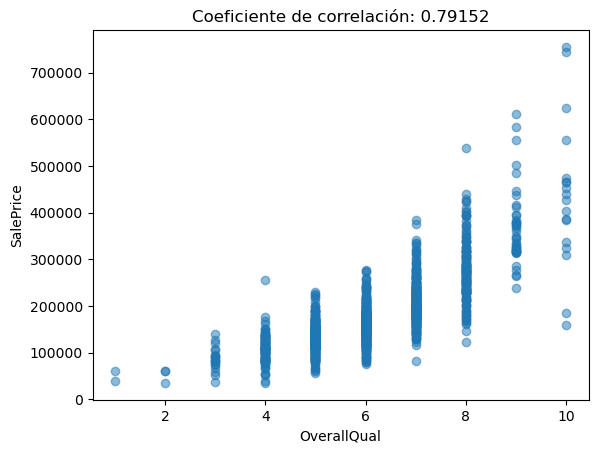

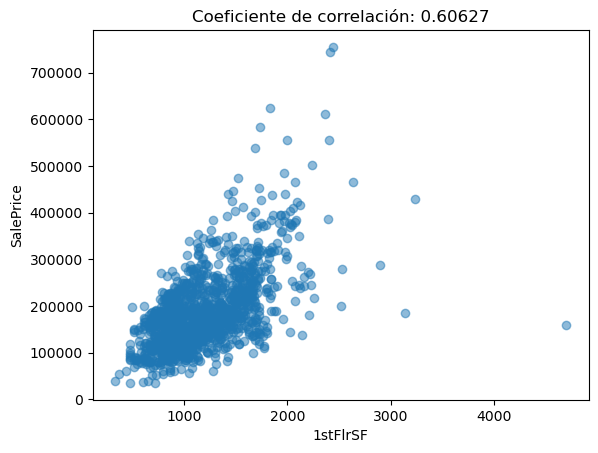

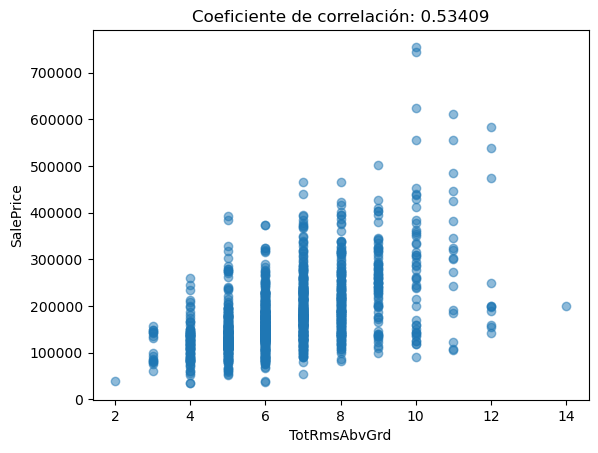

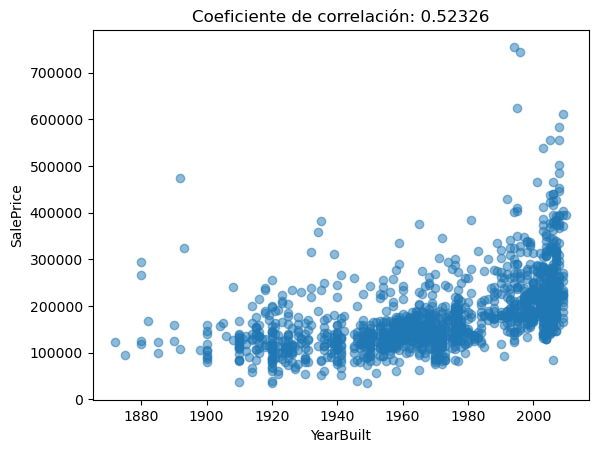

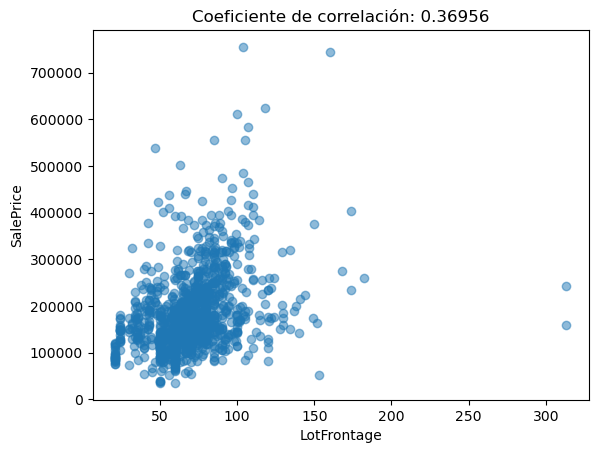

Variables x que representan un mayor valor predictivo
OverallQual  Coeficiente de correlación = 0.7909816005838052
1stFlrSF  Coeficiente de correlación = 0.6058521846919145


In [12]:
for i in range(1,6):
    plt.scatter(data[:,i], data[:,0], alpha=0.5)
    plt.xlabel(columnas_nom[i])
    plt.ylabel(columnas_nom[0])
    plt.title("Coeficiente de correlación: "+str(np.around(coco[0,i], 5)))
    plt.show()
columna_1_predictivo = 1
columna_2_predictivo = 2

print("Variables x que representan un mayor valor predictivo")
print(columnas_nom[columna_1_predictivo], " Coeficiente de correlación =", correlacioncoef[0,columna_1_predictivo])
print(columnas_nom[columna_2_predictivo], " Coeficiente de correlación =", correlacioncoef[0,columna_2_predictivo])

### Crear una función para entrenar un modelo de regresión lineal

In [13]:
def regresion_lineal1(x, y, epochs, imprimir_error_cada, lr, mb):
    
    mAuxiliar = np.hstack((x, np.ones(x.shape) ))
    ma = np.array(mb).reshape(2,1)
    erro = np.zeros(epochs)
    estructuraDatos = {}

    for iteracion in range(1, epochs+1):
        
        yh = np.matmul(mAuxiliar, ma)        
        error = np.nanmean((y - yno)**2)/2
        
        if iteracion%imprimir_error_cada == 0:
            print("error (", iteracion,"):", error)
        erro[iteracion-1] = error
        gradiente = np.nanmean((yh - y)*mAuxiliar, axis=0).reshape(2,1)
        mb = mb - (lr*gradiente)
        estructuraDatos[iteracion] = {'yhat': yh, 'gradiente': gradiente, 'mb': ma}
        if np.isinf(error):
            break
    return (error, estructuraDatos)
        
print("\n La Regresión lineal con el primer valor más predictivo es:")
epochs = 25000
imprimir_error_cada = 5000
lr = 0.001
y = explorar(data_traini[:,0])
x = explorar(data_traini[:,columna_1_predictivo])
resultados_1st_predictivo = regresion_lineal1(x, y, epochs, imprimir_error_cada, lr, [0.001, 0.001])

print("\nLa Regresión lineal con el segundo valor más predictivo es:")
epochs = 20
imprimir_error_cada = 4
lr = 0.000001
y = explorar(data_traini[:,0])
x = explorar(data_traini[:,columna_2_predictivo])
resultados_2nd_predictivo = regresion_lineal1(x, y, epochs, imprimir_error_cada, lr, [200, 50000])


 La Regresión lineal con el primer valor más predictivo es:
error ( 5000 ): 6577325147.110213
error ( 10000 ): 6577325147.110213
error ( 15000 ): 6577325147.110213
error ( 20000 ): 6577325147.110213
error ( 25000 ): 6577325147.110213

La Regresión lineal con el segundo valor más predictivo es:
error ( 4 ): 6577325147.110213
error ( 8 ): 6577325147.110213
error ( 12 ): 6577325147.110213
error ( 16 ): 6577325147.110213
error ( 20 ): 6577325147.110213


###### 	Crear una función que nos permita visualizar con matplotlib cómo cambia el error en el tiempo: crear una función que tome como parámetro el vector de errores generados por la función de entrenamiento y grafique en el eje “x” el número de iteración y en el eje “y”  el error para esa iteración:



Primer valor más predictivo


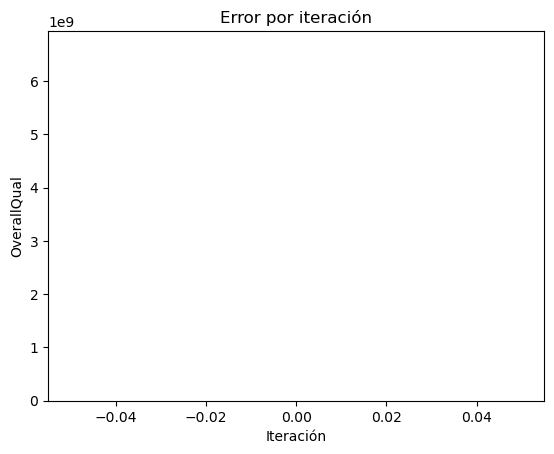


Segundo valor más predictivo


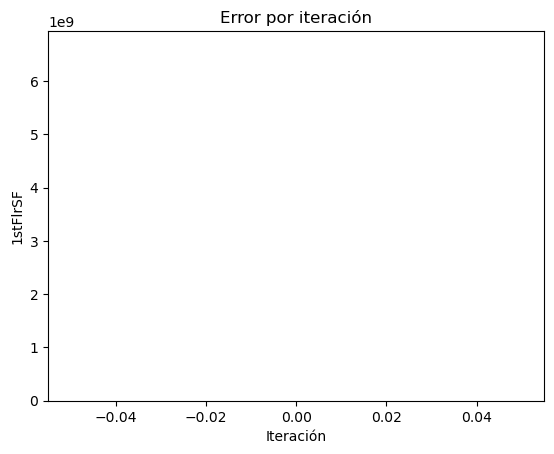

In [14]:
def graficar_error(erro, eje_y_titulo):
   # t = np.arange(erro)
    erro = np.array(erro)
    f, ax = plt.subplots(1)
    plt.title('Error por iteración')
    plt.xlabel('Iteración')
    plt.ylabel(eje_y_titulo)
    ax.plot( erro)
    ax.set_ylim(ymin=0)
    plt.show(f)
    
print("\nPrimer valor más predictivo")
graficar_error(resultados_1st_predictivo[0], columnas_nom[columna_1_predictivo])

print("\nSegundo valor más predictivo")
graficar_error(resultados_2nd_predictivo[0], columnas_nom[columna_2_predictivo])

##### Crear una función que nos permita visualizar con matplotlib cómo evoluciona el modelo entrenado en el tiempo 



La evolución de modelo del primer valor predictivo es:



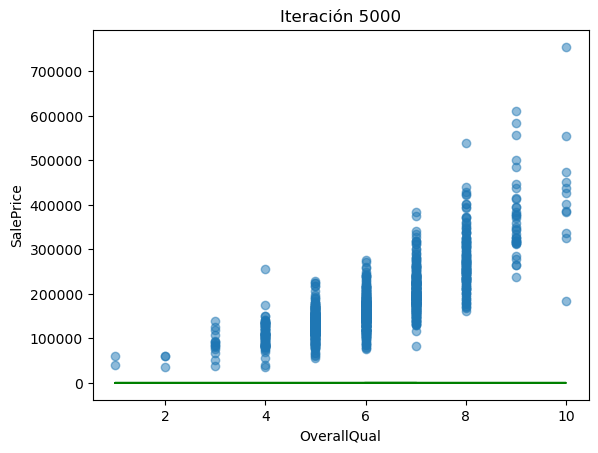

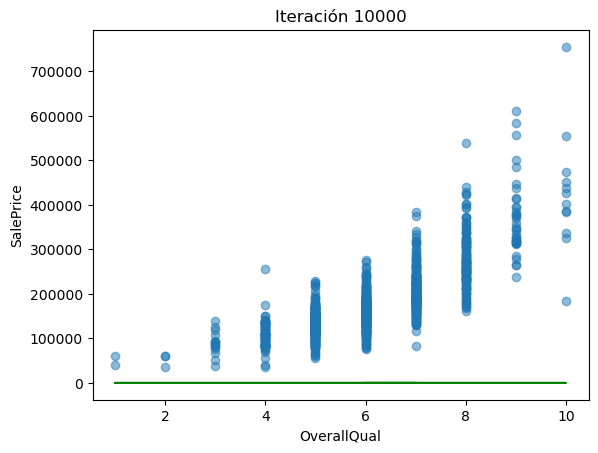

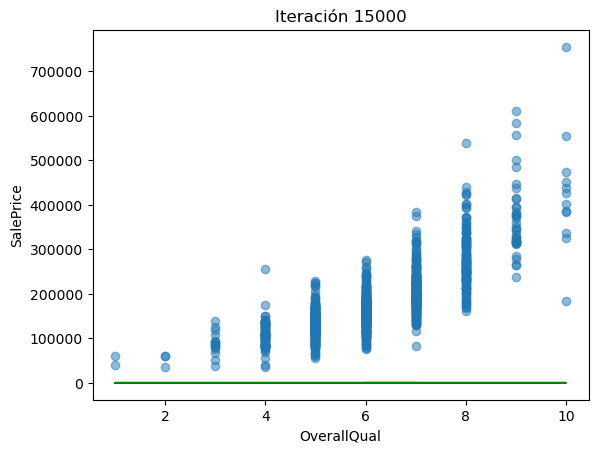

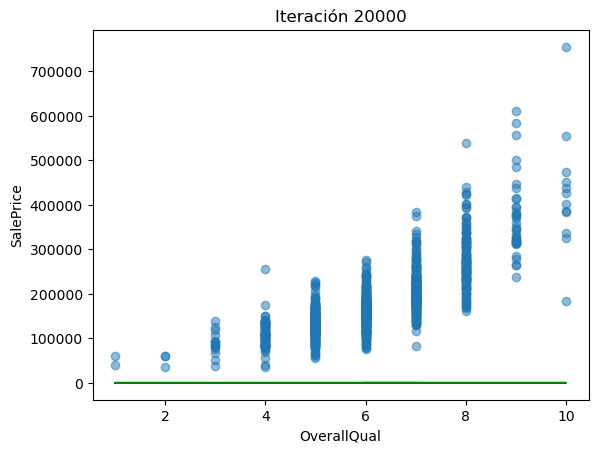


La evolución de modelo del segundo valor predictivo es:



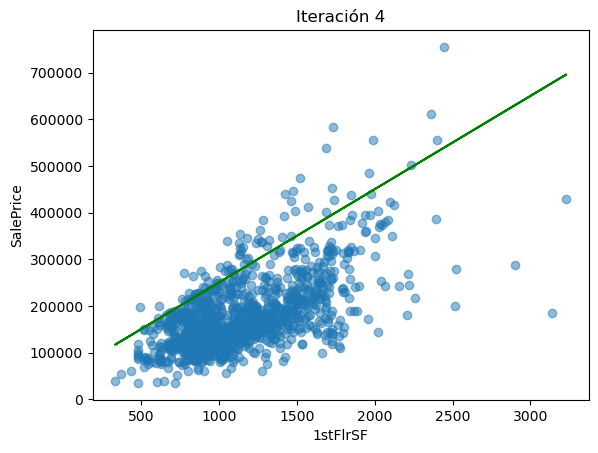

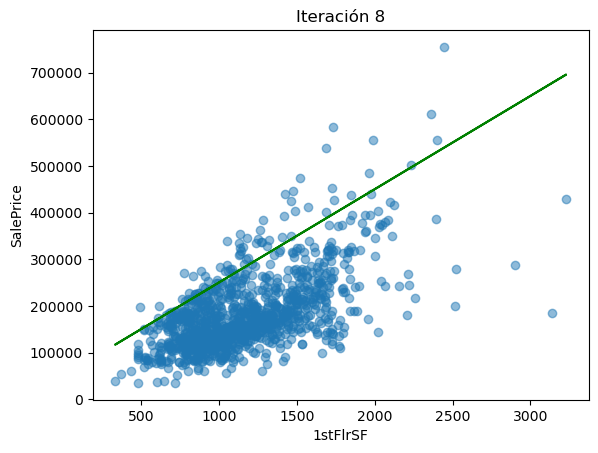

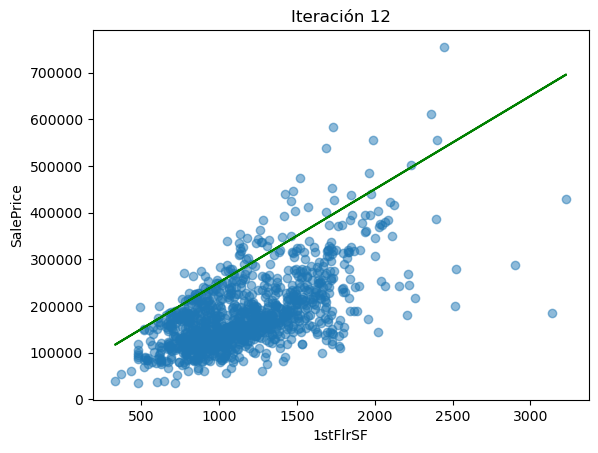

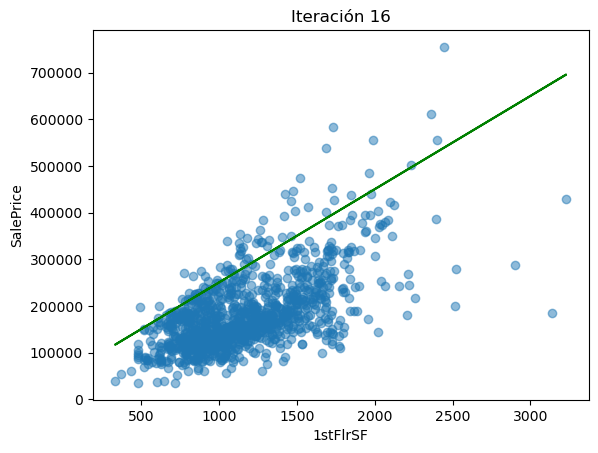

In [16]:
def graficarModelo1(n, resultados, columna_predictiva):
    
    for index in np.arange(n, len(resultados), n):
        mb = resultados[index]['mb']
        
        plt.scatter(data_traini[:,columna_predictiva], data_traini[:,0], alpha=0.5)
        plt.plot(data_traini[:,columna_predictiva], data_traini[:,columna_predictiva]*mb[0] + mb[1], linestyle='solid', color="g")
        
        plt.xlabel(columnas_nom[columna_predictiva])
        plt.ylabel(columnas_nom[0])
        plt.title("Iteración "+str(index))
        plt.show()

print("\nLa evolución de modelo del primer valor predictivo es:\n")
graficarModelo1(5000, resultados_1st_predictivo[1], columna_1_predictivo)
print("\nLa evolución de modelo del segundo valor predictivo es:\n")
graficarModelo1(4, resultados_2nd_predictivo[1], columna_2_predictivo)

#### Regresión Lineal con scikit-learn

In [17]:
def scikitlearnRegresionLineal(columna_predictiva):
    X = explorar(data_traini[:,columna_predictiva])
    y =  explorar(data_traini[:,0])
    scikitlearn_modelo = LinearRegression().fit(X, y)
    print("score:", scikitlearn_modelo.score(X, y))
    print("coef:", scikitlearn_modelo.coef_)
    print("intercept:", scikitlearn_modelo.intercept_)
    return scikitlearn_modelo

print("La Regresión lineal con scikit-learn es:")

print("\nEl Primer variable con más valor predictivo\n")
scikitlearn_modelo_1ra_variable = scikitlearnRegresionLineal(columna_1_predictivo)

print("\nEl Segunda variable con más valor predictivo\n")
scikitlearn_modelo_2nd_variable = scikitlearnRegresionLineal(columna_2_predictivo)

La Regresión lineal con scikit-learn es:

El Primer variable con más valor predictivo

score: 0.6304202002336672
coef: [[45411.99877916]]
intercept: [-96469.57131874]

El Segunda variable con más valor predictivo

score: 0.37981176187078936
coef: [[129.95124229]]
intercept: [30324.58517496]


######	Para cada variable independiente x elegida, crear una función que usando el modelo entrenado manualmente y el modelo de scikit-learn(enviados como parámetros a la funcion) calcule la estimación o predicción de cada uno de estos y devuelva como resultado una predicción estimada promediando las predicciones de los 2  modelos, la función debe recibir como parámetro adicional un vector de cualquier tamaño de x  y devolver 3 vectores cada uno del mismo tamaño del vector x.


In [18]:
precioReal = explorar(data_valida[:,0])

def obteModeloManual(resultados):
    index = len(resultados)
    return resultados[index]['mb']

def predeMdeloRegresionLineal(x, mb):
    matriz_auxiliar = np.hstack((x, np.ones(x.shape) ))
    r = np.matmul(matriz_auxiliar, mb)
    return r

def calculoEstimacion(scikitlearn_modelo_variable, modelo_manual, x):
    scikitlearn_predict = scikitlearn_modelo_variable.predict(x)
    modelo_manual_predict = predeMdeloRegresionLineal(x, modelo_manual)
    promedio = np.nanmean(np.array([scikitlearn_predict, modelo_manual_predict]), axis=0)
    return (scikitlearn_predict,modelo_manual_predict, promedio)

x_1ra_variable = explorar(data_valida[:,columna_1_predictivo])
x_2nd_variable = explorar(data_valida[:,columna_2_predictivo])
estimacion_1ra_variable = calculoEstimacion(scikitlearn_modelo_1ra_variable, obteModeloManual(resultados_1st_predictivo[1]), x_1ra_variable) 
estimacion_2nd_variable = calculoEstimacion(scikitlearn_modelo_2nd_variable, obteModeloManual(resultados_2nd_predictivo[1]), x_2nd_variable) 
      

######  Usando el 20% de los datos de validación, aplicamos los modelos predictivos para estimar la variable dependiente  y usando los valores reales de “y” calculamos el error de cada modelo.


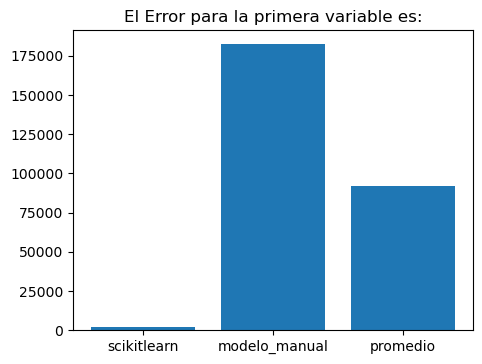

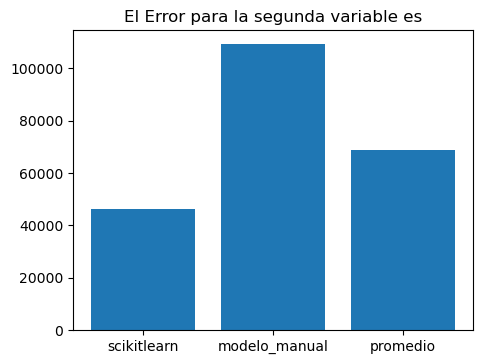

In [19]:
def graficoBarra(scikitlearn, modelo_manual, promedio, titulo):
    plt.rcParams["figure.figsize"] = (4, 3)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    titulos = ['scikitlearn', 'modelo_manual', 'promedio']
    error = [np.nanmean(scikitlearn), np.nanmean(modelo_manual), np.nanmean(promedio)]
    ax.bar(titulos,error)
    plt.title(titulo)
    plt.show()
    
precioReal = explorar(data_valida[:,0])

error1ravariablescikitlearn = precioReal - estimacion_1ra_variable[0]
error1ravariablemodelomanual = precioReal - estimacion_1ra_variable[1]
error1ravariablepromedio = precioReal - estimacion_1ra_variable[2]
graficoBarra(error1ravariablescikitlearn, error1ravariablemodelomanual, error1ravariablepromedio, "El Error para la primera variable es:")

error2ndvariablescikitlearn = np.sqrt((precioReal - estimacion_2nd_variable[0])**2)
error2ndvariablemodelomanual = np.sqrt((precioReal - estimacion_2nd_variable[1])**2)
error2ndvariablepromedio = np.sqrt((precioReal - estimacion_2nd_variable[2])**2)
graficoBarra(error2ndvariablescikitlearn, error2ndvariablemodelomanual, error2ndvariablepromedio, "El Error para la segunda variable es")
